In [2]:
from core.envs import make_envs
import gym
from vis import TD3Policy, evaluate, animate, TD3MARLPolicy, evaluate_MARL
import pygame
import random
import numpy as np
from core.utils import register_metadrive
register_metadrive()

/Users/tanmay/opt/anaconda3/envs/cs269/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/tanmay/Desktop/cs269/core
/Users/tanmay/Desktop/cs269/core
pygame 2.1.2 (SDL 2.0.18, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
Successfully registered the following environments: ['MetaDrive-validation-v0', 'MetaDrive-10env-v0', 'MetaDrive-100envs-v0', 'MetaDrive-1000envs-v0', 'SafeMetaDrive-validation-v0', 'SafeMetaDrive-10env-v0', 'SafeMetaDrive-100envs-v0', 'SafeMetaDrive-1000envs-v0', 'MARLTollgate-v0', 'MARLBottleneck-v0', 'MARLRoundabout-v0', 'MARLIntersection-v0', 'MARLParkingLot-v0', 'MARLMetaDrive-v0'].
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Gen-v0', 'MetaDrive-Gen-v1', 'MetaDrive-Gen-v2', 'MetaDrive-Gen-v3', 'MetaDrive-Gen-Next-v0', 'MetaDrive-Gen-Next-v1', 'MetaDrive-Gen-Next-v2', 'MetaDrive-Alt-Next-v0', 'MetaDrive-Alt-Next-v1', 'MetaDrive-Alt-Next-v2', 'MetaDrive-MARL-v0', 'MetaDrive-MARL-v1', 'MetaDrive-MARL-v2', 'MetaDrive-MARL-v3']


In [108]:
env_name = "MetaDrive-Tut-Hard-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.map_config)


general_env_configs = []
env_name = "MetaDrive-Gen-v0"
for i in range(10):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
    env2 = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
    env2.seed(0)
    env2._reset_global_seed(0)
    general_env_configs.append(env2)

{'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}


Reward Function Changes

In [109]:
#Driving Reward = 0.5, Speed Reward = 0.5

policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Gen-SpeedReward-v0/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

path = "./final_images/MetaDrive-Gen-SpeedReward-v0.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# progress = pd.read_csv("MetaDrive-Gen-SpeedReward-v0/td3/progress.csv")
# plt.figure(dpi=300)
# sns.set("notebook", "darkgrid")
# ax = sns.lineplot(
#     data=progress,
#     x="total_steps",
#     y="episode_reward"
# )
# ax.set_title("Training Progress")
# ax.set_ylabel("Episode Reward Mean")
# ax.set_xlabel("Sampled Steps")

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# # plt.savefig('./final_images/MetaDrive-Gen-SpeedReward-v0-graph.png', format='png', dpi=300, bbox_inches="tight")

gen=0
for i in range(10):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.684
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 73.002
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 114.721
Evaluating 1/1 episodes. Episode is done in 181 steps. Episode reward: 122.195
TD3 agent achieves 122.19541507915625 return in MetaDrive Hard environment.


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.572
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 65.300
Evaluating 1/1 episodes. Episode is done in 137 steps. Episode reward: 67.636
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 23.448
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 77.943
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 134.313
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 184.705
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 216.783
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 249.027
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 278.772
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 302.103
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 325.473
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 346.887
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 356.846
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 371.283
Evaluat

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 16.184
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 60.521
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 107.889
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 149.215
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 164.502
Evaluating 1/1 episodes. Episode is done in 252 steps. Episode reward: 159.502
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 15.056
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 51.087
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 72.449
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 121.714
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 156.979
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 190.622
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 204.954
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 237.541
Evaluating 1/1 episodes. Episode is done in 415 steps. Episode reward: 241.370


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.554
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 83.347
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 109.704
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 139.309
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 158.730
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 175.938
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 199.062
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 232.484
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 269.247
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 306.221
Evaluating 1/1 episodes. Episode is done in 524 steps. Episode reward: 334.315


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.572
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 65.300
Evaluating 1/1 episodes. Episode is done in 137 steps. Episode reward: 67.636
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.551
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 49.685
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 87.237
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 121.643
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 129.405
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 134.753
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 138.364
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 141.248
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 144.546
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 144.898
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 148.745
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 150.537
Evaluati

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 21.280
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 58.696
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 101.773
Evaluating 1/1 episodes. Episode is done in 180 steps. Episode reward: 112.089


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 21.761
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 48.667
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 56.744
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 90.385
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 152.485
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 194.795
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 226.934
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 265.406
Evaluating 1/1 episodes. Episode is done in 414 steps. Episode reward: 285.465


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 22.642
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 71.511
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 117.777
Evaluating 1/1 episodes. Episode is done in 164 steps. Episode reward: 121.028
General Reward:  205.85926949312005


In [110]:
env_name = "MetaDrive-Tut-Hard-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.map_config)


general_env_configs = []
env_name = "MetaDrive-Gen-v0"
for i in range(10):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
    env2 = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
    env2.seed(0)
    env2._reset_global_seed(0)
    general_env_configs.append(env2)

{'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}


In [111]:
#Driving Reward = 5, Speed Reward = 0.1
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Gen-DrivingReward-v0/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

path = "./final_images/MetaDrive-Gen-DrivingReward-v0.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# progress = pd.read_csv("MetaDrive-Gen-DrivingReward-v0/td3/progress.csv")
# plt.figure(dpi=300)
# sns.set("notebook", "darkgrid")
# ax = sns.lineplot(
#     data=progress,
#     x="total_steps",
#     y="episode_reward"
# )
# ax.set_title("Training Progress")
# ax.set_ylabel("Episode Reward Mean")
# ax.set_xlabel("Sampled Steps")

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-Gen-DrivingReward-v0-graph.png', format='png', dpi=300, bbox_inches="tight")

gen=0
for i in range(10):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.764
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 77.261
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 113.490
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 134.456
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 141.169
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 152.126
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 160.612
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 167.795
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 174.038
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 179.504
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 199.108
Evaluating 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 22.403
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 83.608
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 125.575
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 158.291
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 210.816
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 220.939
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 232.183
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 267.724
Evaluating 1/1 episodes. Episode is done in 424 steps. Episode reward: 296.283


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 21.195
Evaluating 1/1 episodes. Episode is done in 95 steps. Episode reward: 55.569
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 21.813
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 69.926
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 108.383
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 143.207
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 147.660
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 164.308
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 174.130
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 183.574
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 186.393
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 187.501
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 187.598
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 190.551
Evaluat

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 19.525
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 56.402
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 93.669
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 138.597
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 169.813
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 192.750
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 211.951
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 237.990
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 265.192
Evaluating 1/1 episodes. Episode is done in 483 steps. Episode reward: 294.623


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 23.210
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 73.679
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 100.182
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 126.112
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 148.808
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 167.031
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 179.790
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 203.050
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 227.545
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 253.781
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 267.618
Evaluating 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 22.403
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 83.608
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 125.575
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 158.291
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 210.816
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 220.939
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 232.183
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 267.724
Evaluating 1/1 episodes. Episode is done in 424 steps. Episode reward: 296.283
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 20.523
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 38.067
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 66.688
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 112.513
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 120.057
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 126.003
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 132.442
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 135.758
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 136.290
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 136.294
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 136.525
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 136.777
Evaluati

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.060
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 60.023
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 113.272
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 146.403
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 164.484
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 207.242
Evaluating 1/1 episodes. Episode is done in 324 steps. Episode reward: 232.704


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 21.085
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 67.023
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 108.469
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 159.519
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 188.143
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 219.016
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 259.641
Evaluating 1/1 episodes. Episode is done in 375 steps. Episode reward: 287.456


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 20.166
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 71.534
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 110.596
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 127.942
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 174.774
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 212.842
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 250.724
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 293.211
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 311.717
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 343.069
Evaluating 1/1 episodes. Episode is done in 535 steps. Episode reward: 372.735
General Reward:

Varying Lane num and Width

In [112]:
env_name = "MetaDrive-Tut-Hard-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.map_config)


general_env_configs = []
env_name = "MetaDrive-Gen-v0"
for i in range(10):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
    env2 = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
    env2.seed(0)
    env2._reset_global_seed(0)
    general_env_configs.append(env2)

{'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}


In [113]:
#Random Lane Width
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Gen-LaneWidth-v0/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

path = "./final_images/MetaDrive-Gen-LaneWidth-v0.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# progress = pd.read_csv("MetaDrive-Gen-LaneWidth-v0/td3/progress.csv")
# plt.figure(dpi=300)
# sns.set("notebook", "darkgrid")
# ax = sns.lineplot(
#     data=progress,
#     x="total_steps",
#     y="episode_reward"
# )
# ax.set_title("Training Progress")
# ax.set_ylabel("Episode Reward Mean")
# ax.set_xlabel("Sampled Steps")

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-Gen-LaneWidth-v0-graph.png', format='png', dpi=300, bbox_inches="tight")

gen=0
for i in range(10):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 29.235
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 73.928
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 109.079
Evaluating 1/1 episodes. Episode is done in 180 steps. Episode reward: 123.012
TD3 agent achieves 123.01238174889062 return in MetaDrive Hard environment.


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.373
Evaluating 1/1 episodes. Episode is done in 87 steps. Episode reward: 73.586


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.472
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 76.857
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 125.530
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 183.868
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 219.756
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 250.616
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 277.689
Evaluating 1/1 episodes. Episode is done in 397 steps. Episode reward: 287.609
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.635
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 68.200
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 106.680
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 137.015
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 150.698
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 173.324
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 179.620
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 185.758
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 188.416
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 192.368
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 209.448
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 229.455
Evaluat

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.252
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 113.429
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 142.035
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 177.745
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 194.417
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 215.703
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 241.018
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 267.240
Evaluating 1/1 episodes. Episode is done in 425 steps. Episode reward: 294.042


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 29.819
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 81.210
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 104.192
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 138.391
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 162.495
Evaluating 1/1 episodes. Episode is done in 295 steps. Episode reward: 170.908
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.373
Evaluating 1/1 episodes. Episode is done in 87 steps. Episode reward: 73.586
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.867
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 47.568
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 89.132
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 115.689
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 125.220
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 130.625
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 135.151
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 138.828
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 141.534
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 142.284
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 144.437
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 144.794
Evaluati

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.603
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 73.635
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 113.049
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 146.427
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 171.321
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 216.110
Evaluating 1/1 episodes. Episode is done in 307 steps. Episode reward: 231.703


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.329
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 105.384
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 158.083
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 189.025
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 237.232
Evaluating 1/1 episodes. Episode is done in 289 steps. Episode reward: 281.144


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.213
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 104.661
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 125.116
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 149.797
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 190.559
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 230.586
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 272.138
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 290.300
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 308.977
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 342.653
Evaluating 1/1 episodes. Episode is done in 516 steps. Episode reward: 369.164
General Reward

In [120]:
env_name = "MetaDrive-Tut-Hard-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.map_config)


general_env_configs = []
env_name = "MetaDrive-Gen-v0"
for i in range(10):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
    env2 = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config,"random_traffic":True})
    env2.seed(0)
    env2._reset_global_seed(0)
    general_env_configs.append(env2)

{'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}


In [121]:
#Random Lane Num
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Gen-LaneNum-v0/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

path = "./final_images/MetaDrive-Gen-LaneNum-v0.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# progress = pd.read_csv("MetaDrive-Gen-LaneNum-v0/td3/progress.csv")
# plt.figure(dpi=300)
# sns.set("notebook", "darkgrid")
# ax = sns.lineplot(
#     data=progress,
#     x="total_steps",
#     y="episode_reward"
# )
# ax.set_title("Training Progress")
# ax.set_ylabel("Episode Reward Mean")
# ax.set_xlabel("Sampled Steps")

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-Gen-LaneNum-v0-graph.png', format='png', dpi=300, bbox_inches="tight")

gen=0
for i in range(10):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.934
Evaluating 1/1 episodes. Episode is done in 95 steps. Episode reward: 69.450
TD3 agent achieves 69.44950553670478 return in MetaDrive Hard environment.


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.345
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 58.489
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 72.232
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 111.605
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 141.246
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 176.717
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 210.553
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 218.009
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 230.055
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 274.344
Evaluating 1/1 episodes. Episode is done in 515 steps. Episode reward: 293.418


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.483
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 75.979
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 113.668
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 156.122
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 184.349
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 208.513
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 239.340
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 260.649
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 288.758
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 315.861
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 336.493
Evaluating 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 25.902
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 51.645
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 89.674
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 120.656
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 149.782
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 179.423
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 195.607
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 226.507
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 249.534
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 278.981
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 313.207
Evaluating 1/1 episodes. Episode is done in 561 steps. Episode reward: 329.945


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 25.375
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 97.368
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 133.777
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 174.934
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 184.797
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 197.957
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 225.883
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 263.519
Evaluating 1/1 episodes. Episode is done in 427 steps. Episode reward: 294.469


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 29.965
Evaluating 1/1 episodes. Episode is done in 90 steps. Episode reward: 67.442
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.345
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 55.495
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 68.885
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 107.324
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 132.657
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 164.228
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 186.569
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 206.818
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 222.564
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 226.435
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 261.624
Evaluating 1/1 episodes. Episode is done in 587 steps. Episode reward: 292.391
Evaluating 1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.347
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 89.740
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 118.158
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 136.561
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 156.023
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 178.199
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 219.831
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 252.924
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 257.645
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 294.729
Evaluating 1/1 episodes. Episode is done in 527 steps. Episode reward: 338.417
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 28.383
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 73.283
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 120.259
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 166.571
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 208.578
Evaluating 1/1 episodes. Episode is done in 269 steps. Episode reward: 232.729


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 27.516
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 57.873
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 71.809
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 136.128
Evaluating 1/1 episodes. Episode is done in 218 steps. Episode reward: 146.336


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.264
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 88.815
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 138.341
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 178.484
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 220.302
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 264.353
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 290.424
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 298.887
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 312.659
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 352.529
Evaluating 1/1 episodes. Episode is done in 524 steps. Episode reward: 374.253
General Reward:

In [123]:
env_name = "MetaDrive-Tut-Hard-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.map_config)


general_env_configs = []
env_name = "MetaDrive-Gen-v0"
for i in range(10):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
    env2 = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config,"random_traffic":True})
    env2.seed(0)
    env2._reset_global_seed(0)
    general_env_configs.append(env2)

{'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}


In [124]:
#Random Lane and Width
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-test-og-td3/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

path = "./final_images/MetaDrive-Gen-LaneWidthNum-v0.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# progress = pd.read_csv("MetaDrive-Gen-LaneWidthNum-v0/td3/progress.csv")
# plt.figure(dpi=300)
# sns.set("notebook", "darkgrid")
# ax = sns.lineplot(
#     data=progress,
#     x="total_steps",
#     y="episode_reward"
# )
# ax.set_title("Training Progress")
# ax.set_ylabel("Episode Reward Mean")
# ax.set_xlabel("Sampled Steps")

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-Gen-LaneWidthNum-v0-graph.png', format='png', dpi=300, bbox_inches="tight")

gen=0
for i in range(10):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 23.148
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 52.132
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 85.629
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 116.469
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 125.772
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 154.805
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 160.753
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 173.804
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 182.414
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 191.567
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 215.455
Evaluating 1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 22.453
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 52.454
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 73.484
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 118.422
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 143.057
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 173.390
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 207.915
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 218.497
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 234.846
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 267.310
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 282.803
Evaluating 1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 21.174
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 55.582
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 99.853
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 154.028
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 202.793
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 230.759
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 247.906
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 277.211
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 300.511
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 341.303
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 351.046
Evaluating 1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 23.903
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 67.859
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 102.298
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 138.131
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 150.895
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 168.199
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 191.963
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 200.939
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 214.059
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 241.477
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 281.565
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 312.538
Evaluat

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.691
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 62.496
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 95.183
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 136.001
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 175.012
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 195.783
Evaluating 1/1 episodes. Episode is done in 327 steps. Episode reward: 209.685
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 23.020
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 58.489
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 90.088
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 123.219
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 164.444
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 202.056
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 221.943
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 240.190
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 269.232
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 300.044
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 320.136
Evaluating 1/1 episodes. Episode is done in 588 steps. Episode reward: 338.577
Evaluating 1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 22.453
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 54.698
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 83.220
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 121.007
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 154.882
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 180.993
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 203.750
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 217.837
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 233.801
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 266.500
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 281.930
Evaluating 1/1 episodes. Episode is done in 565 steps. Episode reward: 294.463


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.191
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 74.867
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 92.703
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 106.573
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 132.255
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 145.859
Evaluating 1/1 episodes. Episode is done in 319 steps. Episode reward: 145.950


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 25.595
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 61.481
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 106.743
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 146.373
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 191.876
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 216.149
Evaluating 1/1 episodes. Episode is done in 318 steps. Episode reward: 231.334


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 26.774
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 59.001
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 78.782
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 120.714
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 165.568
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 187.567
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 233.080
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 256.948
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 272.517
Evaluating 1/1 episodes. Episode is done in 457 steps. Episode reward: 283.727


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 24.898
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 79.089
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 109.828
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 133.791
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 173.266
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 217.773
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 257.316
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 293.281
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 303.272
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 320.350
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 352.713
Evaluating 

Modifying Neural Network Architectures

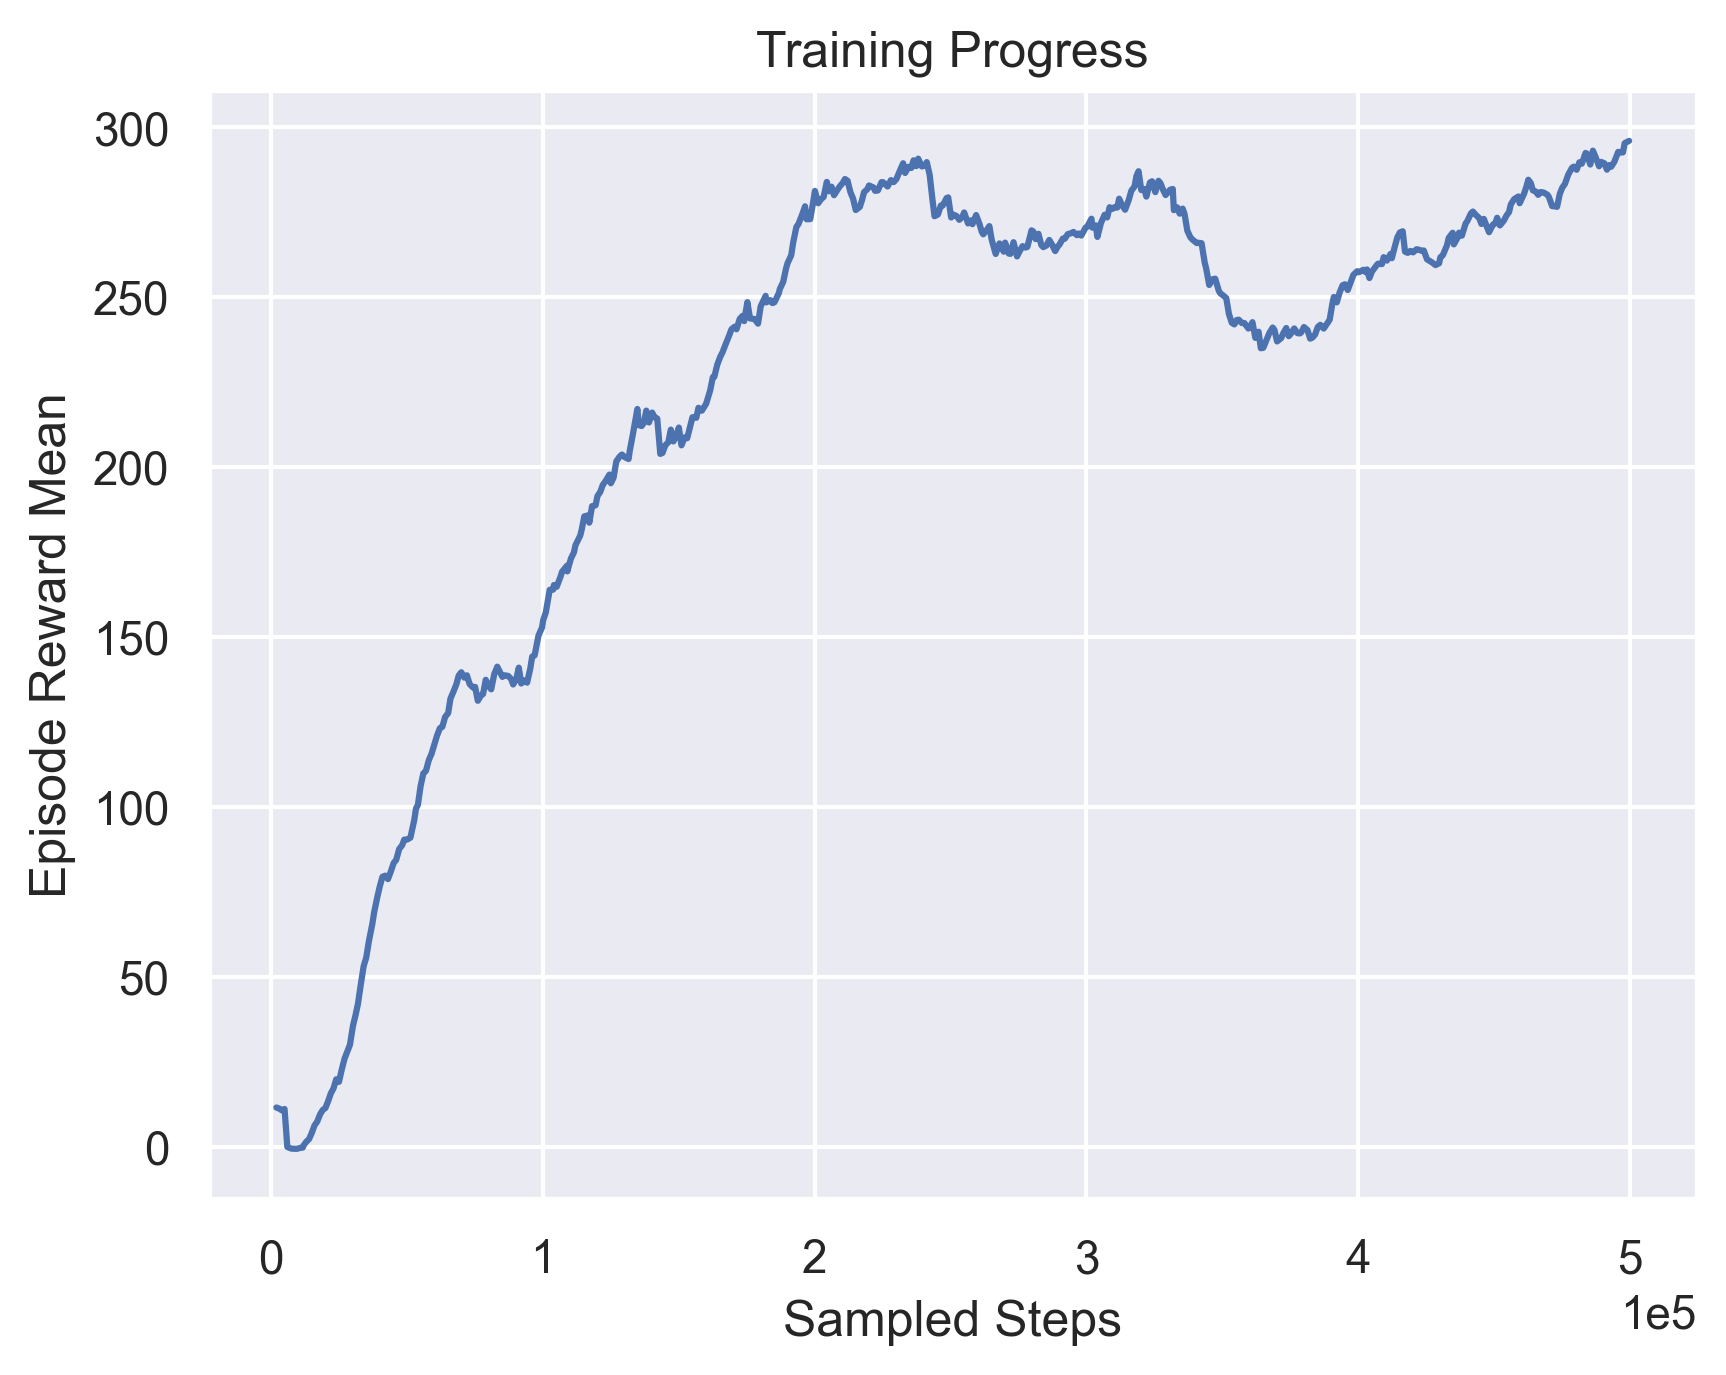

In [7]:
#Standard TD3 with random lane width, num, traffic density
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
# policy = TD3Policy(
#     env_name,  # In order to get the observation shape
#     num_envs=1, 
#     log_dir="MetaDrive-test-og-td3/td3/",
#     suffix="final"
# )

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
# eval_reward, eval_info = evaluate(
#     policy=policy, 
#     num_episodes=1, 
#     existing_env=env,
#     render="topdown",  # Visualize the behaviors in top-down view
#     verbose=True
# )

# frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
# import tempfile

# import IPython
# import PIL
# import gym
# import numpy as np
# from IPython.display import clear_output

# print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-og-td3-v0.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-og-td3/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('./final_images/MetaDrive-test-og-td3-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

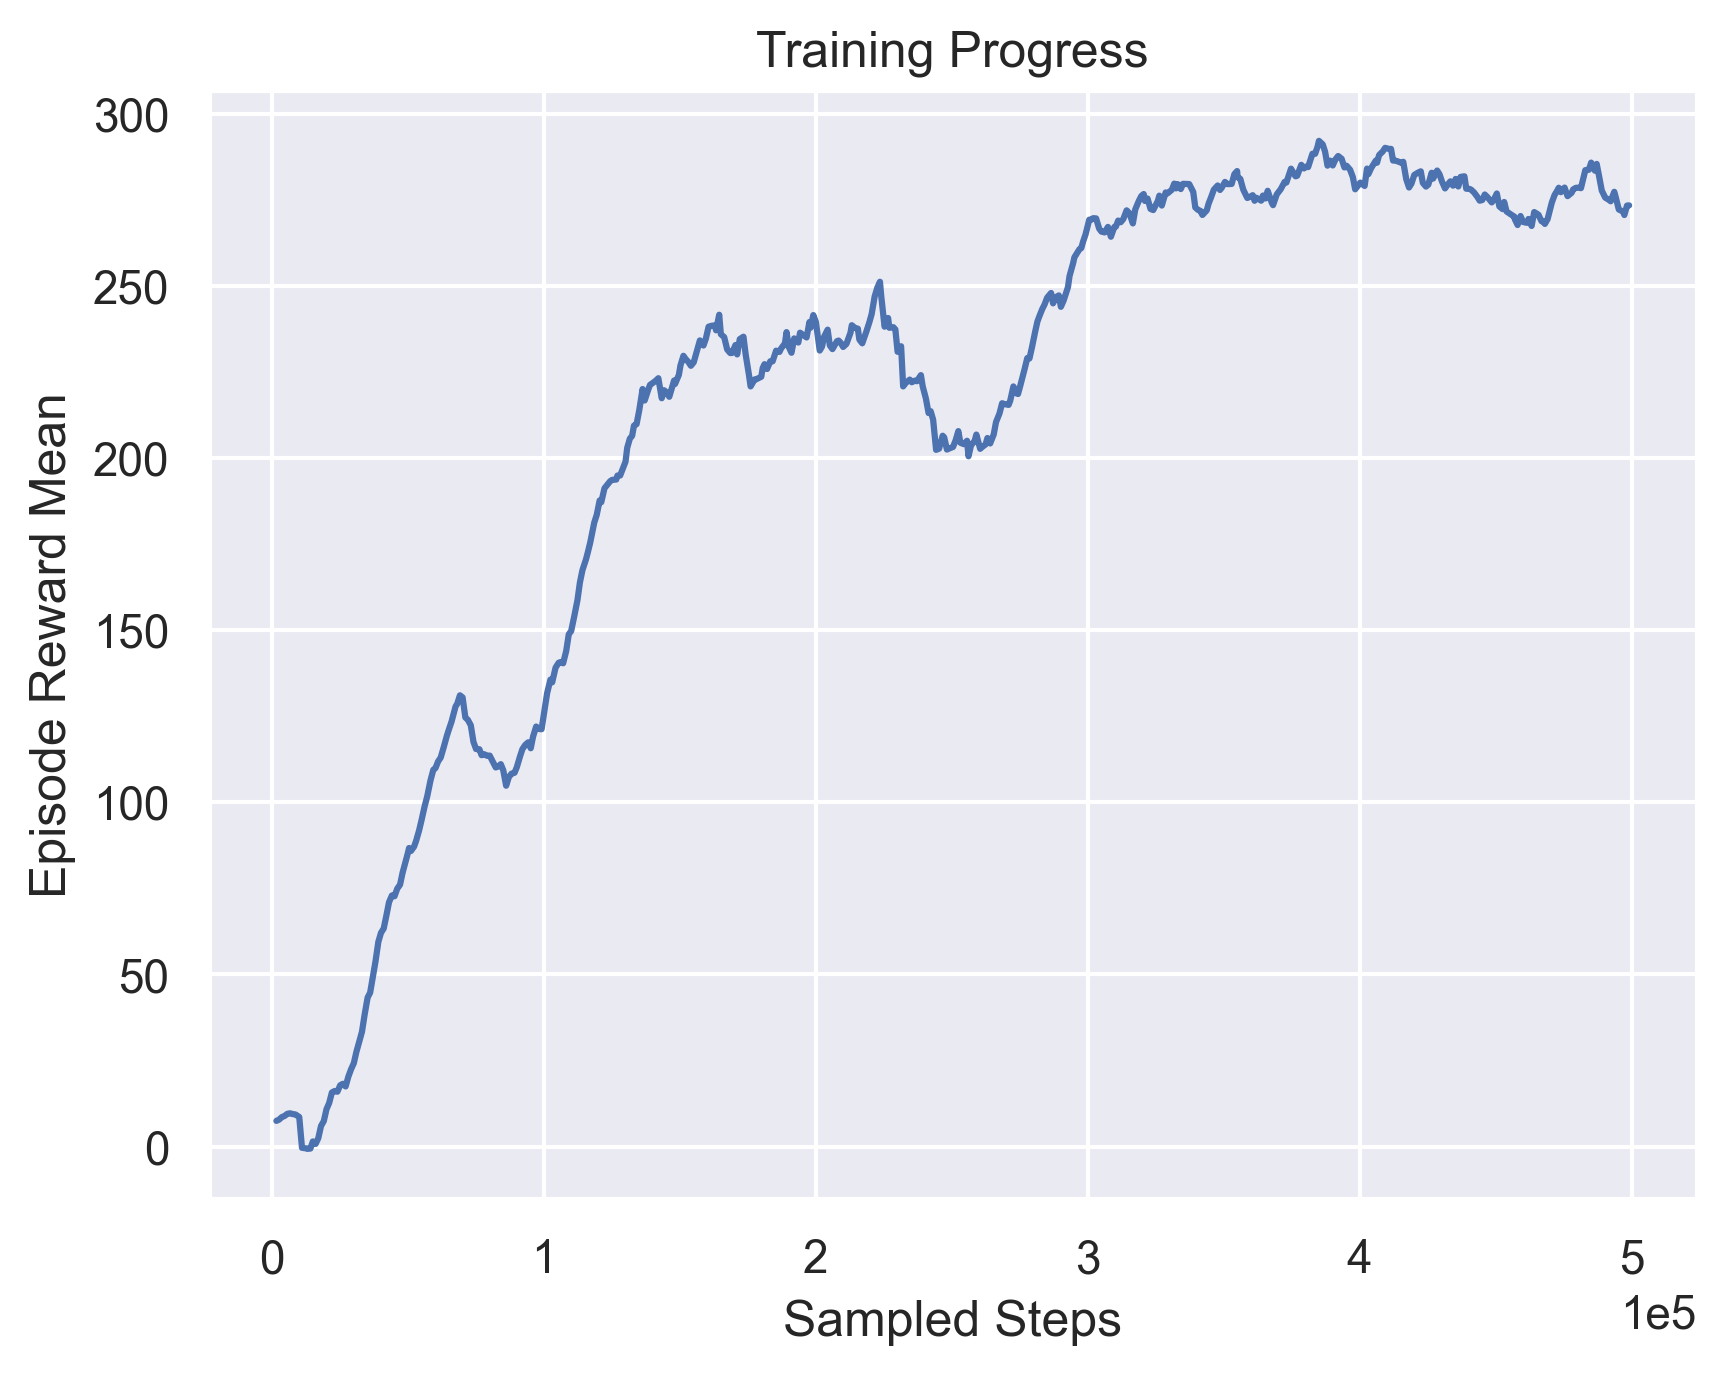

In [128]:
#Standard TD3 with actor convolutional network
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
# policy = TD3Policy(
#     env_name,  # In order to get the observation shape
#     num_envs=1, 
#     log_dir="MetaDrive-test-small-conv-colab-actor-dropout1d/td3/",
#     suffix="final"
# )

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
# eval_reward, eval_info = evaluate(
#     policy=policy, 
#     num_episodes=1, 
#     existing_env=env,
#     render="topdown",  # Visualize the behaviors in top-down view
#     verbose=True
# )

# frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
# import tempfile

# import IPython
# import PIL
# import gym
# import numpy as np
# from IPython.display import clear_output

# print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-small-conv-colab-actor-dropout1d.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-small-conv-colab-actor-dropout1d/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('./final_images/MetaDrive-test-small-conv-colab-actor-dropout1d-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

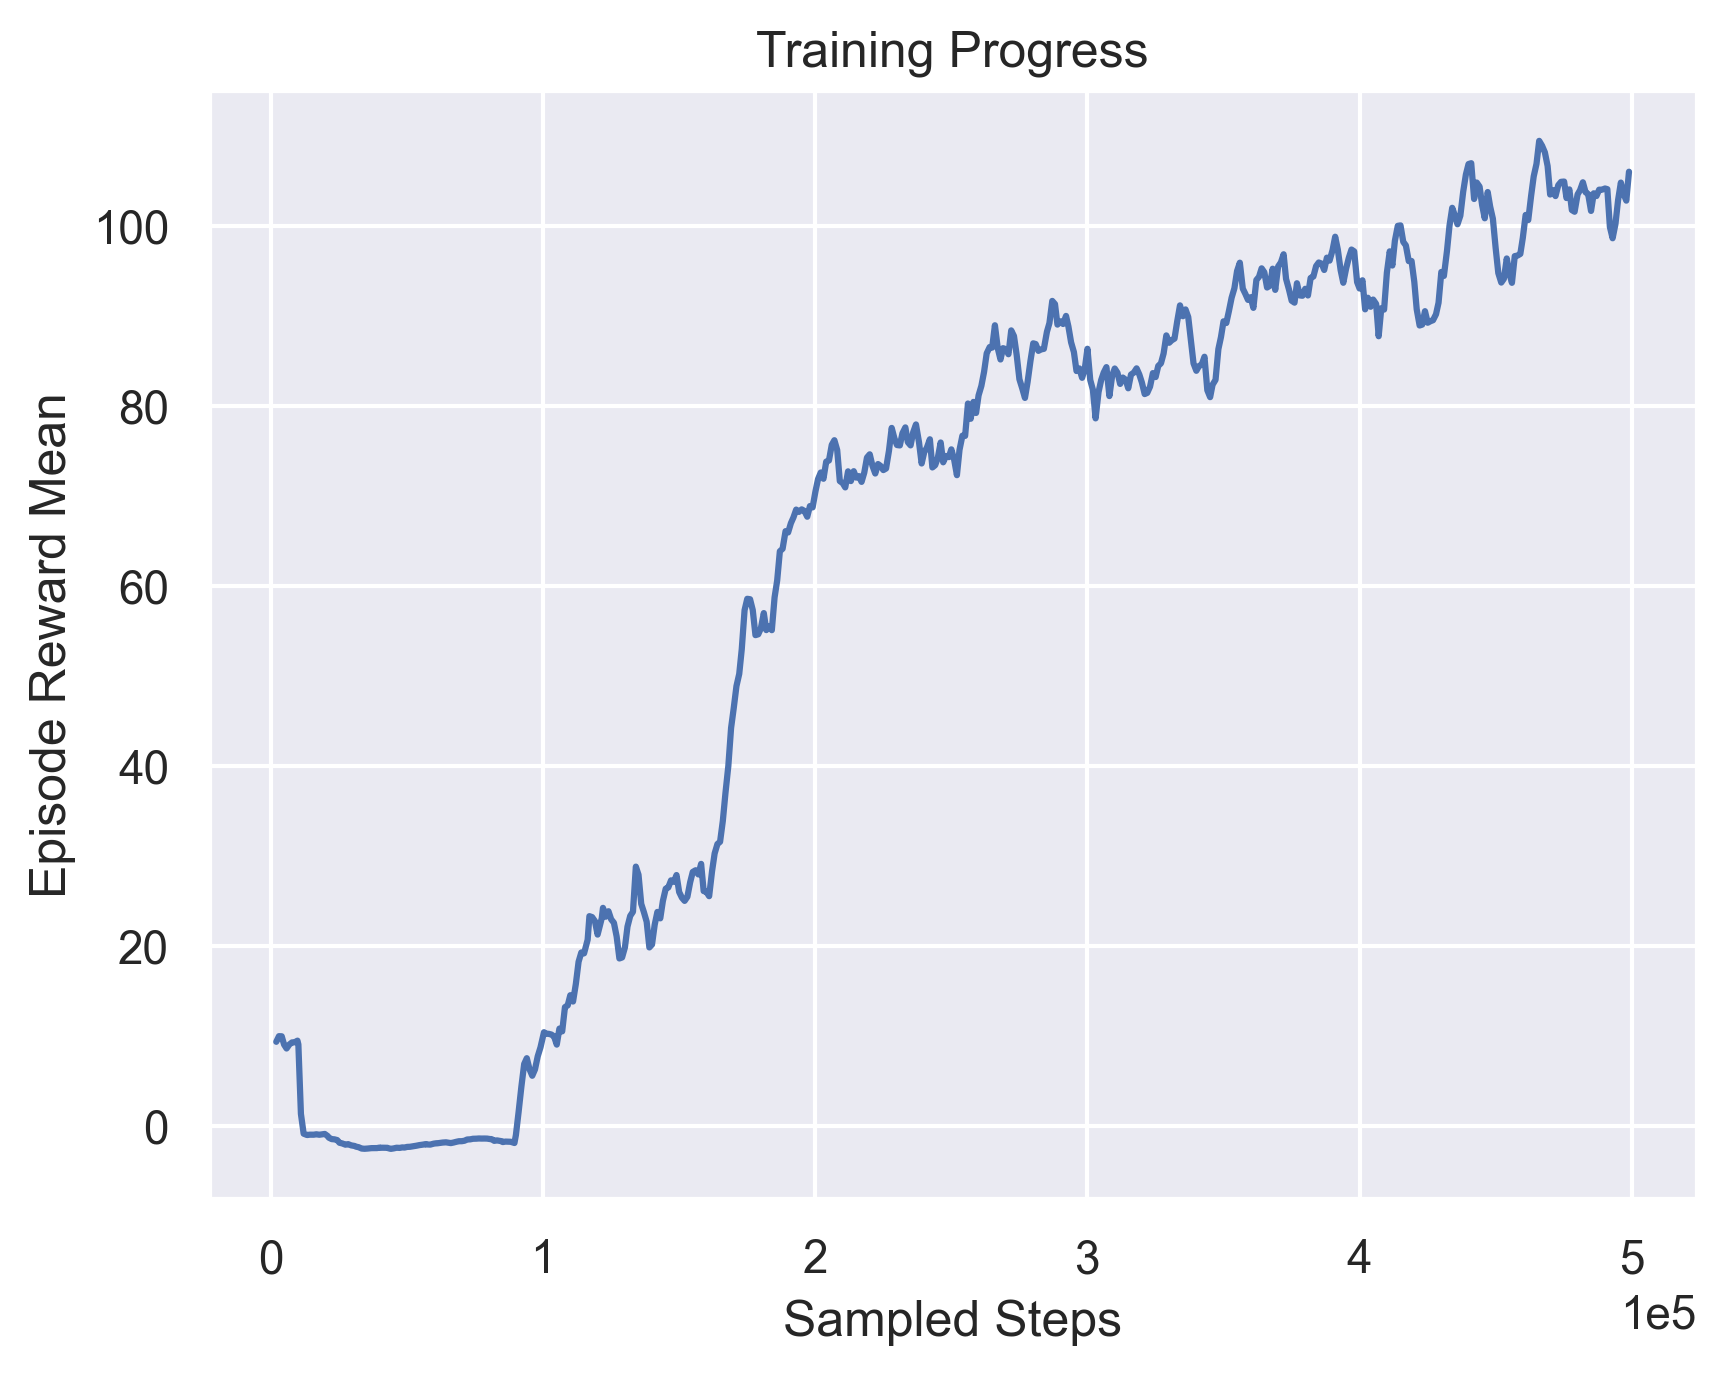

In [127]:
#Standard TD3 with Critic convolutional network
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
# policy = TD3Policy(
#     env_name,  # In order to get the observation shape
#     num_envs=1, 
#     log_dir="MetaDrive-test-conv-colab-critic/td3/",
#     suffix="final"
# )

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
# eval_reward, eval_info = evaluate(
#     policy=policy, 
#     num_episodes=1, 
#     existing_env=env,
#     render="topdown",  # Visualize the behaviors in top-down view
#     verbose=True
# )

# frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
# import tempfile

# import IPython
# import PIL
# import gym
# import numpy as np
# from IPython.display import clear_output

# print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-conv-colab-critic.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-conv-colab-critic/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('./final_images/MetaDrive-test-conv-colab-critic-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

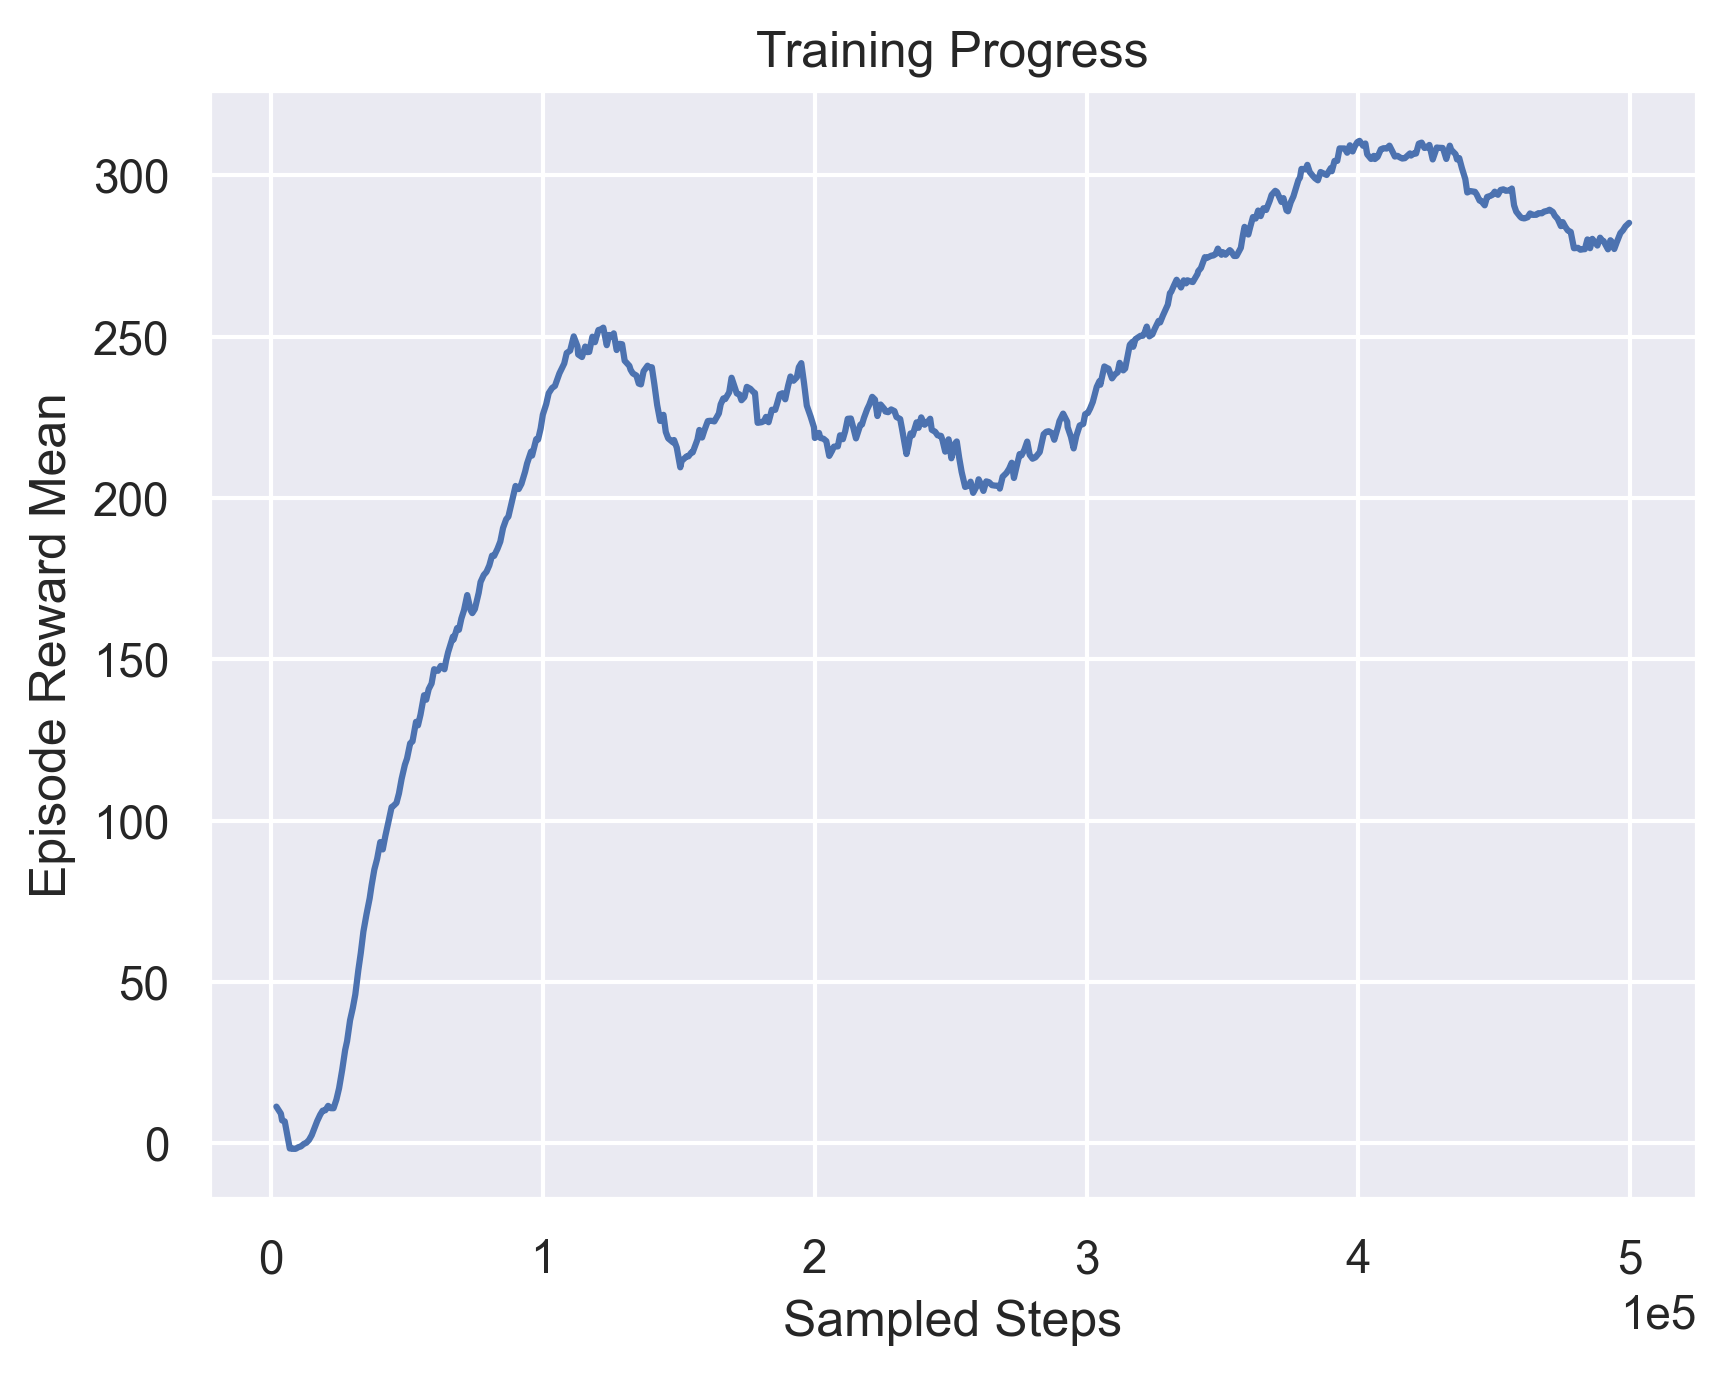

In [126]:
#Standard TD3 with Leaky relu activation
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
# policy = TD3Policy(
#     env_name,  # In order to get the observation shape
#     num_envs=1, 
#     log_dir="MetaDrive-test-leaky/td3/",
#     suffix="final"
# )

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
# eval_reward, eval_info = evaluate(
#     policy=policy, 
#     num_episodes=1, 
#     existing_env=env,
#     render="topdown",  # Visualize the behaviors in top-down view
#     verbose=True
# )

# frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
# import tempfile

# import IPython
# import PIL
# import gym
# import numpy as np
# from IPython.display import clear_output

# print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-leaky.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-leaky/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('./final_images/MetaDrive-test-leaky-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

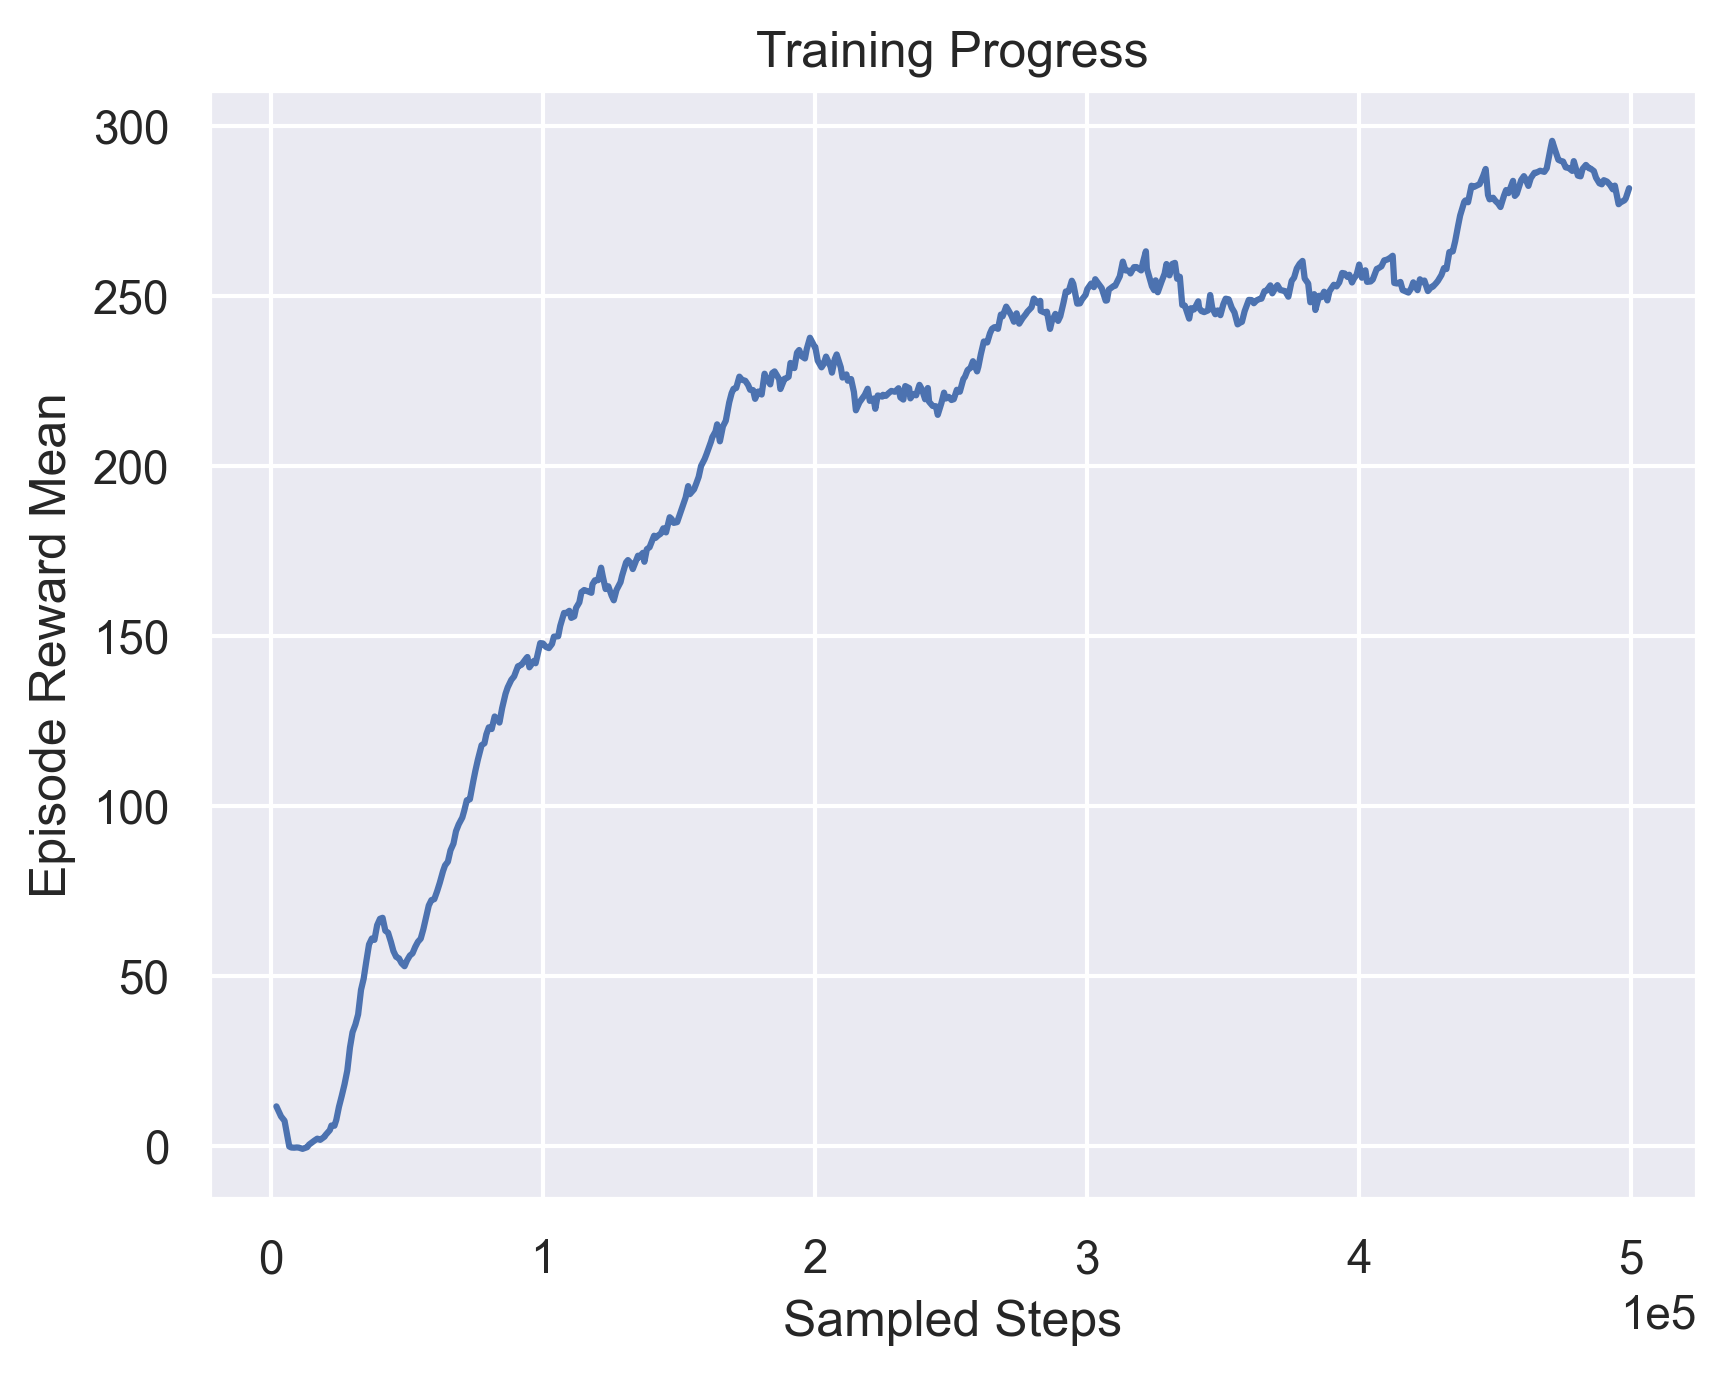

In [125]:
#Standard TD3 with AdamW optimizer
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-test-adamW/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
# eval_reward, eval_info = evaluate(
#     policy=policy, 
#     num_episodes=1, 
#     existing_env=env,
#     render="topdown",  # Visualize the behaviors in top-down view
#     verbose=True
# )

# frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
# import tempfile

# import IPython
# import PIL
# import gym
# import numpy as np
# from IPython.display import clear_output

# print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-adamW.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-adamW/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('./final_images/MetaDrive-test-adamW-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

Noise Reduction + reducing Q difference

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 29.312
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 84.078
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 107.544
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 135.923
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 148.696
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 167.381
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 172.256
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 178.614
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 187.815
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 205.615
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 243.324
Evaluating 

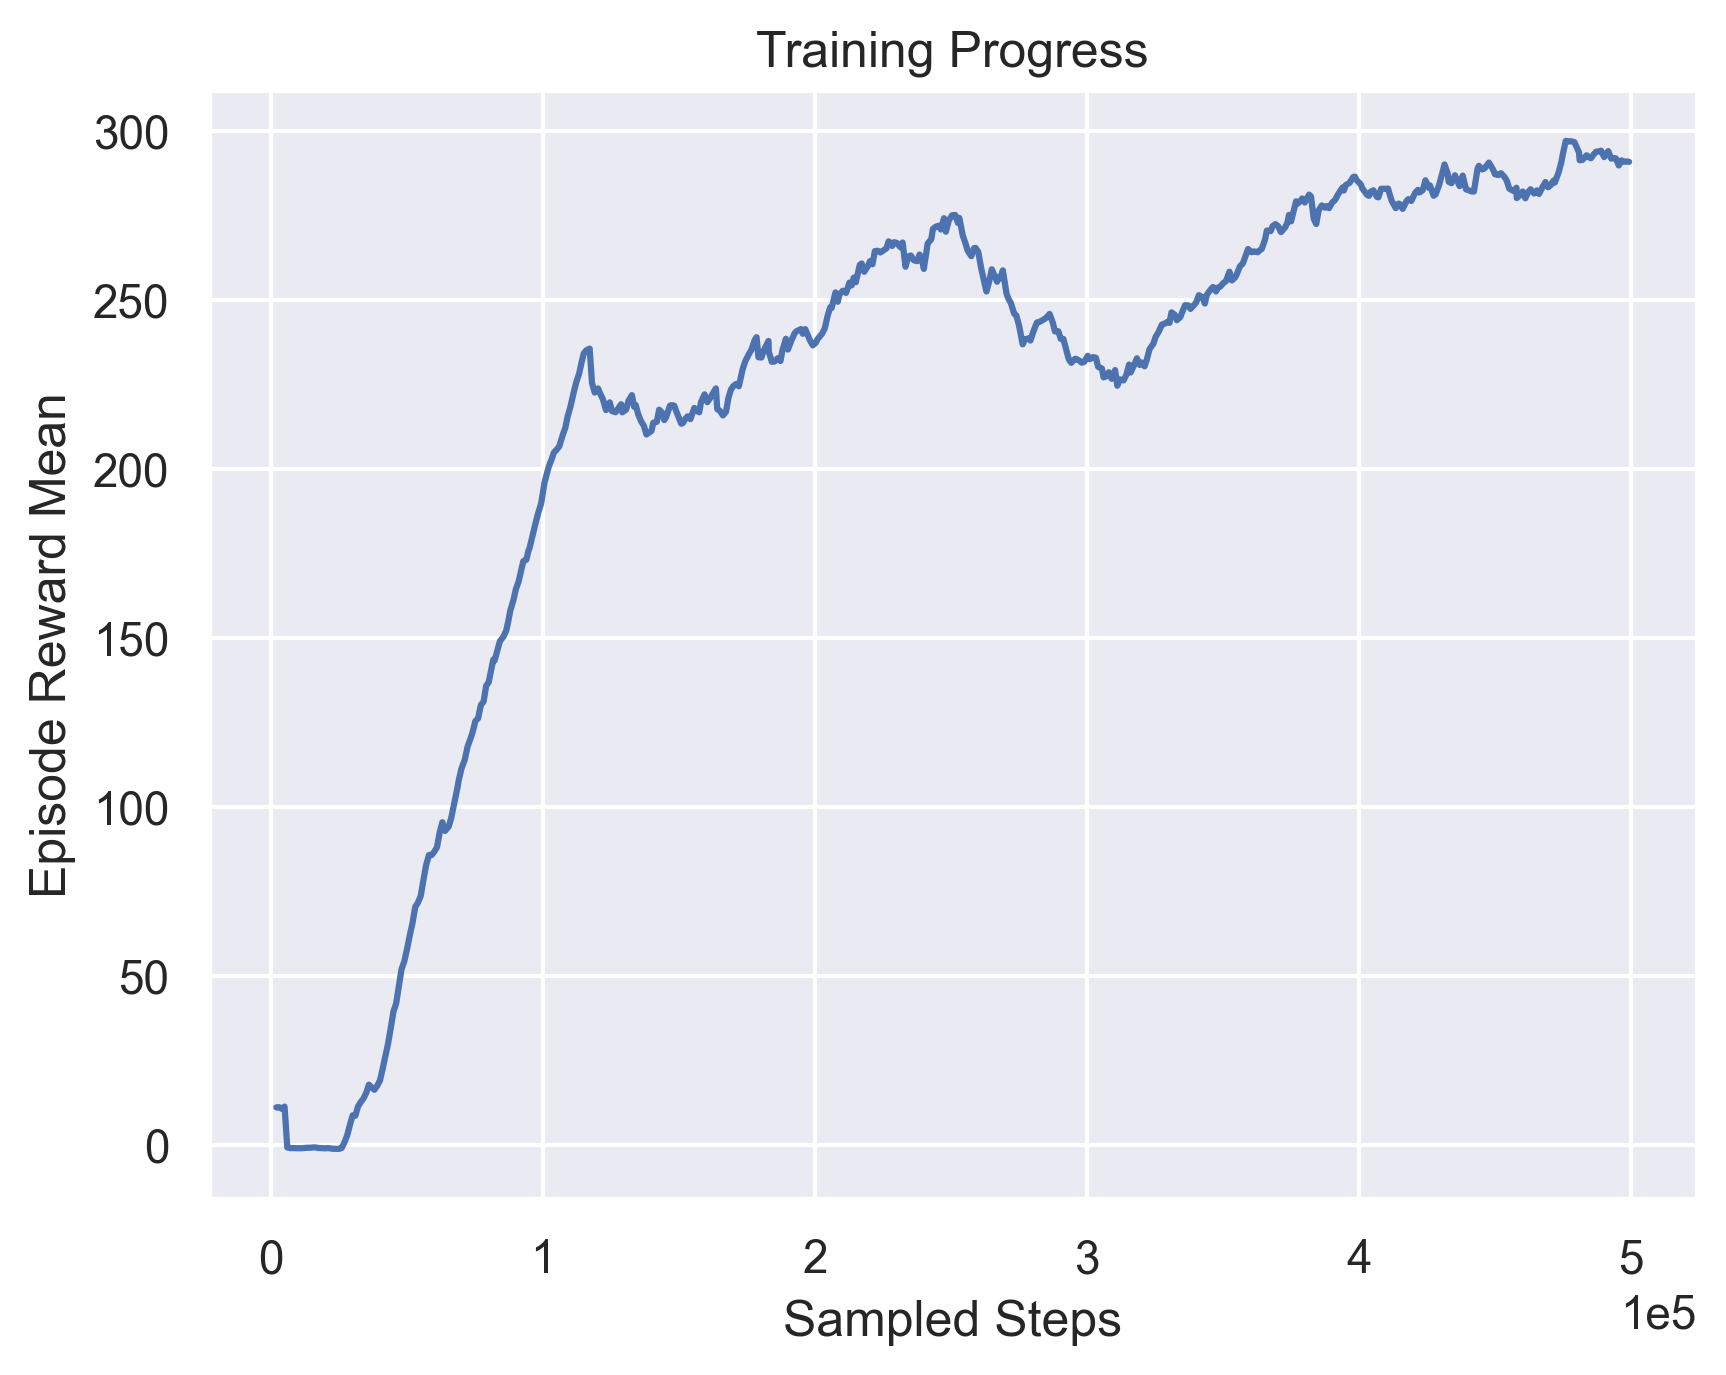

In [12]:
#Standard TD3 reducing Q difference (min + 0.01(max-min))
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

# env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-test-reducing-q-diff-td3/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-reducing-q-diff-td3.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-reducing-q-diff-td3/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-test-reducing-q-diff-td3-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 10.471
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 41.647
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 72.118
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 105.850
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 138.049
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 164.991
Evaluating 1/1 episodes. Episode is done in 309 steps. Episode reward: 163.631
TD3 agent achieves 163.630741847652 return in MetaDrive Hard environment.


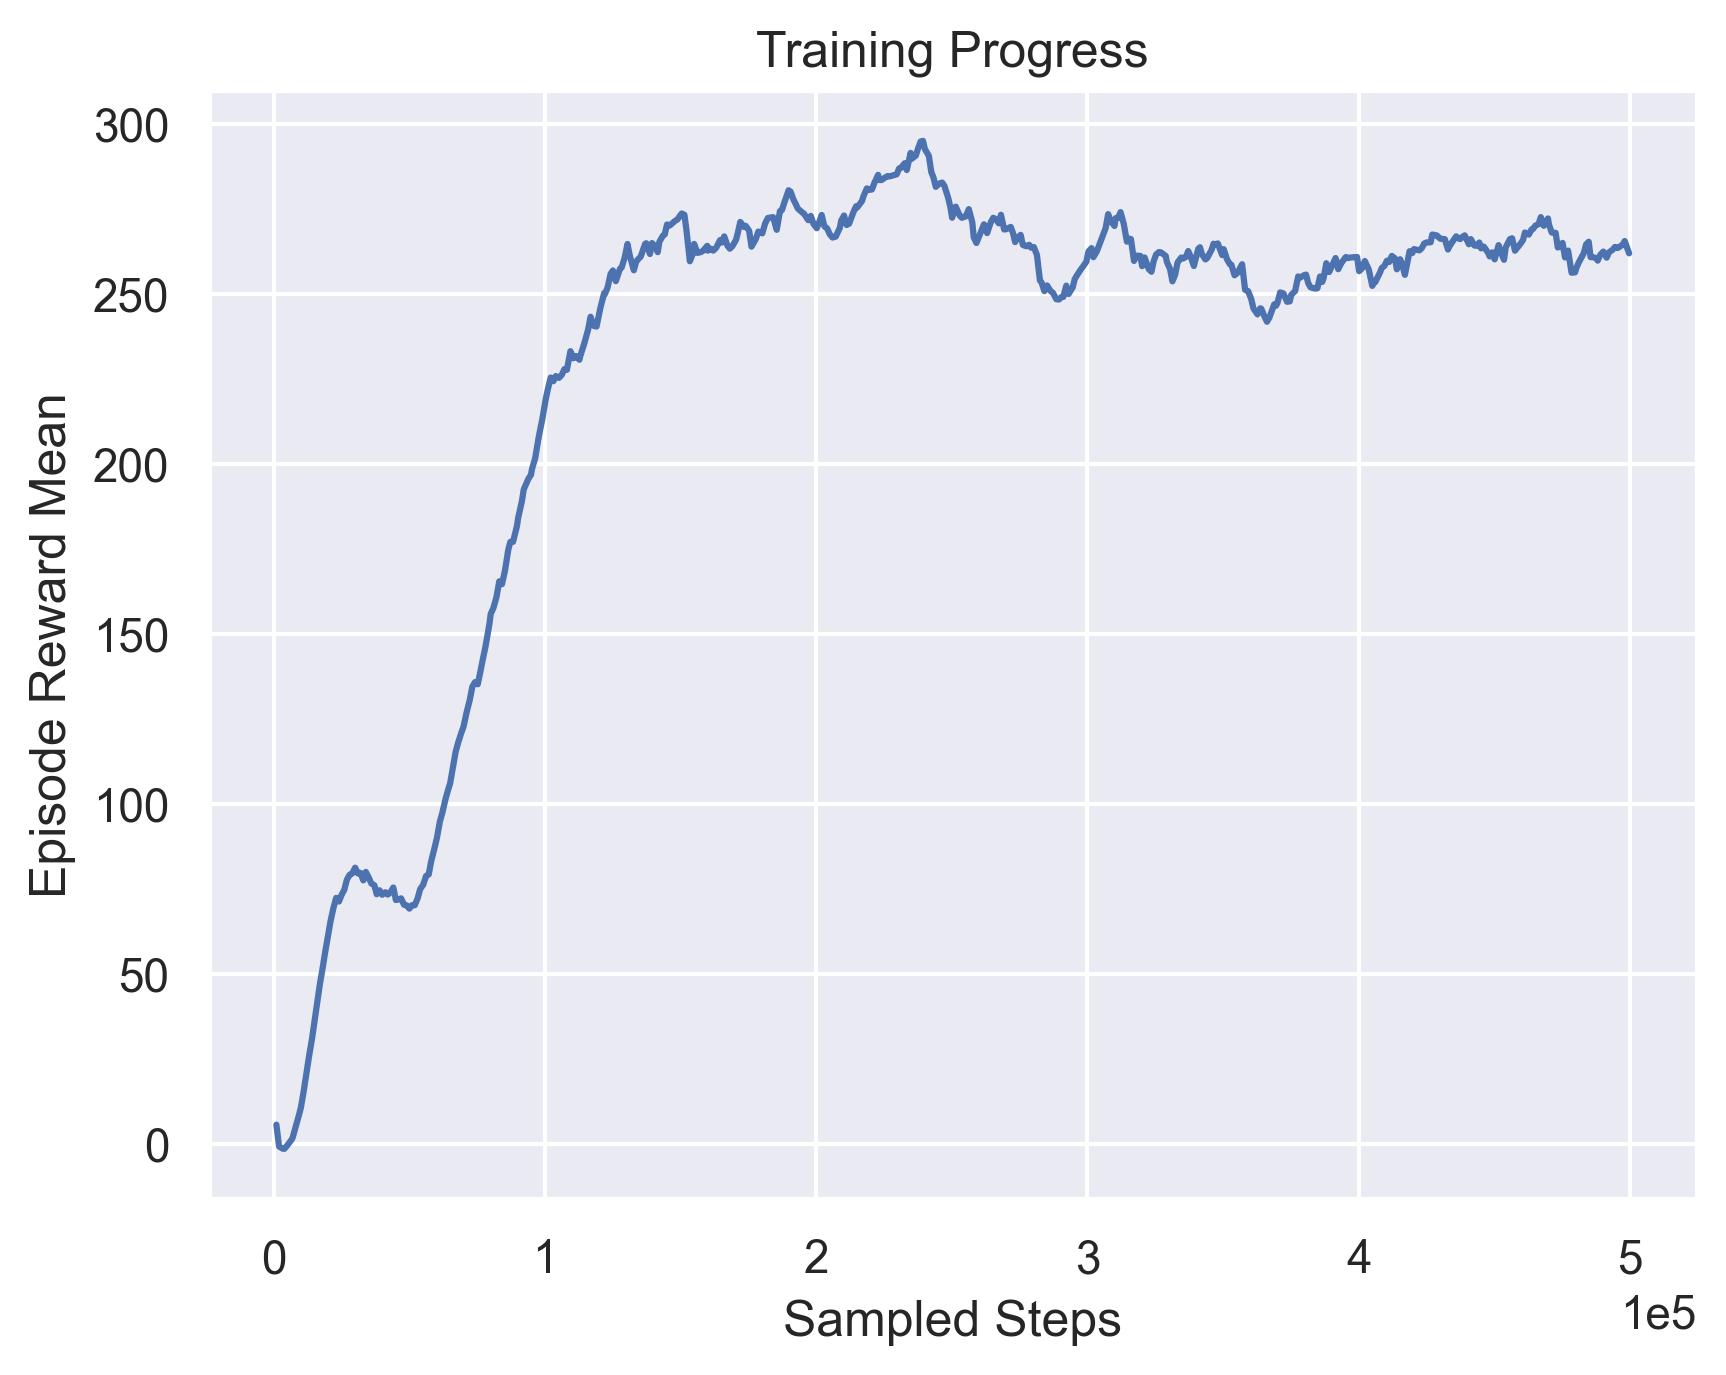

In [13]:
#Reducing noise added to action in TD3
# from core.envs import make_envs
# import gym
# from vis import TD3Policy, evaluate, animate
# import pygame
# import random
# import numpy as np

env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-test-noise-reduction-td3-1000/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-test-noise-reduction-td3-1000.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-test-noise-reduction-td3-1000/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("Training Progress")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-test-noise-reduction-td3-1000-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

MARL Experiments

In [72]:
env_name = "MetaDrive-MARL-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":30,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.vehicle_config)

general_env_configs = []
env_name = "MetaDrive-MARL-v0"
for i in range(6):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
    start_seed = 30*i
    env_gen = gym.make(env_name, config={"environment_num":1, "start_seed":start_seed,"map_config":map_config})
    env_gen.seed(0)
    env_gen._reset_global_seed(0)
    general_env_configs.append(env_gen)

{'increment_steering': False, 'vehicle_model': 'static_default', 'show_navi_mark': True, 'extra_action_dim': 0, 'enable_reverse': False, 'random_navi_mark_color': False, 'show_dest_mark': False, 'show_line_to_dest': False, 'use_special_color': False, 'image_source': 'rgb_camera', 'navigation_module': None, 'need_navigation': True, 'spawn_lane_index': ('>', '>>', 0), 'spawn_longitude': 5.0, 'spawn_lateral': 0.0, 'destination': None, 'overtake_stat': False, 'action_check': False, 'random_color': True, 'random_agent_model': False, 'lidar': {'num_lasers': 240, 'distance': 50, 'num_others': 0, 'gaussian_noise': 0.0, 'dropout_prob': 0.0, 'add_others_navi': False}, 'side_detector': {'num_lasers': 0, 'distance': 50, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'lane_line_detector': {'num_lasers': 0, 'distance': 20, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'show_lidar': False, 'mini_map': (84, 84, 250), 'rgb_camera': (84, 84), 'depth_camera': (84, 84, True), 'show_side_detector': False, 'sh

In [73]:
# #Standard general policy in MARL
# env_name = "MetaDrive-MARL-v0"
policy = TD3MARLPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-test-og-td3/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":120,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)

# # Render the learned behavior
# # NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate_MARL(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
path = "./final_images/marl_with_gen_policy.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

gen=0
for i in range(5):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate_MARL(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/5.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 2.309
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 13.515
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 41.646
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 88.052
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 138.379
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 190.674
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 239.239
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 280.154
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 310.593
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 335.736
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 365.086
Evaluating 1/1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: -6.028
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: -2.434
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 9.259
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 33.121
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 63.270
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 86.765
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 102.503
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 127.824
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 154.904
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 186.089
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 206.051
Evaluating 1/1 e

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 5.299
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 16.676
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 39.887
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 80.687
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 131.186
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 190.756
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 249.229
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 300.698
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 344.998
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 383.713
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 426.001
Evaluating 1/1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 3.679
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 18.955
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 42.342
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 70.529
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 103.558
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 134.875
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 168.950
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 201.946
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 234.917
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 266.396
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 297.788
Evaluating 1/1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 6.505
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 30.658
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 68.291
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 108.289
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 151.192
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 192.966
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 230.737
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 271.072
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 307.596
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 345.157
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 389.292
Evaluating 1/

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 6.106
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 26.726
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 64.701
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 100.600
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 127.722
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 153.503
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 178.862
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 212.649
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 245.925
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 283.635
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 322.892
Evaluating 1/

In [36]:
env_name = "MetaDrive-MARL-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":30,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.vehicle_config)

general_env_configs = []
env_name = "MetaDrive-MARL-v0"
for i in range(6):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
    start_seed = 30*i
    env_gen = gym.make(env_name, config={"environment_num":1, "start_seed":start_seed,"map_config":map_config})
    env_gen.seed(0)
    env_gen._reset_global_seed(0)
    general_env_configs.append(env_gen)

{'increment_steering': False, 'vehicle_model': 'static_default', 'show_navi_mark': True, 'extra_action_dim': 0, 'enable_reverse': False, 'random_navi_mark_color': False, 'show_dest_mark': False, 'show_line_to_dest': False, 'use_special_color': False, 'image_source': 'rgb_camera', 'navigation_module': None, 'need_navigation': True, 'spawn_lane_index': ('>', '>>', 0), 'spawn_longitude': 5.0, 'spawn_lateral': 0.0, 'destination': None, 'overtake_stat': False, 'action_check': False, 'random_color': True, 'random_agent_model': False, 'lidar': {'num_lasers': 240, 'distance': 50, 'num_others': 0, 'gaussian_noise': 0.0, 'dropout_prob': 0.0, 'add_others_navi': False}, 'side_detector': {'num_lasers': 0, 'distance': 50, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'lane_line_detector': {'num_lasers': 0, 'distance': 20, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'show_lidar': False, 'mini_map': (84, 84, 250), 'rgb_camera': (84, 84), 'depth_camera': (84, 84, True), 'show_side_detector': False, 'sh

In [39]:
# #Chained policy in MARL
# env_name = "MetaDrive-MARL-v0"
policy = TD3MARLPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-td3combine-expt3/MetaDrive-Gen-v3/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":70,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)

# # Render the learned behavior
# # NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate_MARL(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
path = "./final_images/marl_with_chained_policy.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

gen=0
for i in range(5):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate_MARL(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/5.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: -0.751
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 2.434
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 22.122
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 50.625
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 86.179
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 122.763
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 159.388
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 173.207
Evaluating 1/1 episodes. Episode is done in 408 steps. Episode reward: 164.372
TD3 agent achieves 164.37161910572493 return in MetaDrive MARL environment.


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 1.883
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 0.966
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: -4.587
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 2.718
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 37.514
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 58.050
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 84.037
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 106.424
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 134.311
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 163.841
Evaluating 1/1 episodes. Episode is done in 510 steps. Episode reward: 166.962


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: -3.999
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: -2.800
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 3.858
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 27.801
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 47.364
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 68.290
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 95.309
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 128.712
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 148.243
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 161.644
Evaluating 1/1 episodes. Episode is done in 550 steps. Episode reward: 168.436
Evaluating 1/1 episod

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: -4.717
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: -9.553
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: -17.793
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: -30.597
Evaluating 1/1 episodes. Episode is done in 212 steps. Episode reward: -43.976
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: -4.046
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 8.446
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 30.762
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 56.682
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 83.175
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 98.180
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 101.703
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 78.702
Evaluating 1/1 episodes. Episode is done in 401 steps. Episode reward: 78.702
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 3.872
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 18.019
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 44.623
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 80.403
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 124.393
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 172.759
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 217.220
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 263.999
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 313.271
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 364.639
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 414.216
Evaluating 1/1 episodes. We are in 601/1000 steps. Current episode reward: 466.388
Evaluating

In [102]:
env_name = "MetaDrive-MARL-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":30,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)

general_env_configs = []
env_name = "MetaDrive-MARL-v0"
for i in range(6):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
    start_seed = 30*i
    env_gen = gym.make(env_name, config={"environment_num":1, "start_seed":start_seed,"map_config":map_config})
    env_gen.seed(0)
    env_gen._reset_global_seed(0)
    general_env_configs.append(env_gen)

In [103]:
# #Chained policy with safe environment in MARL
env_name = "MetaDrive-MARL-v0"
policy = TD3MARLPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Expt-Safe-Combine/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":120,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate_MARL(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
path = "./final_images/marl_with_chained_safe_policy.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

gen=0
for i in range(5):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate_MARL(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/5.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 1.437
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 14.977
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 36.713
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 72.676
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 111.026
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 154.654
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 199.802
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 243.380
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 285.838
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 326.759
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 364.641
Evaluating 1/1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 1.954
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 15.621
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 36.389
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 64.902
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 99.883
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 140.657
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 187.097
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 238.635
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 292.265
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 344.041
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 391.421
Evaluating 1/1 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 2.128
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 13.428
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 36.950
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 71.476
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 111.633
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 155.932
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 202.894
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 246.074
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 288.074
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 328.285
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 365.064
Evaluating 1/1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 1.378
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 13.523
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 28.360
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 49.850
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 74.656
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 106.623
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 137.628
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 169.181
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 199.758
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 231.405
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 263.491
Evaluating 1/1 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 4.450
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 16.569
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 35.443
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 58.346
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 86.906
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 118.665
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 153.412
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 184.606
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 219.029
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 251.202
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 281.903
Evaluating 1/1 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 2.884
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 15.028
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 31.645
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 52.832
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 77.162
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 106.199
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 140.006
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 173.480
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 208.044
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 241.333
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 277.374
Evaluating 1/1 

In [42]:
env_name = "MetaDrive-MARL-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":30,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.vehicle_config)

general_env_configs = []
env_name = "MetaDrive-MARL-v0"
for i in range(6):
    map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
    start_seed = 30*i
    env_gen = gym.make(env_name, config={"environment_num":1, "start_seed":start_seed,"map_config":map_config})
    env_gen.seed(0)
    env_gen._reset_global_seed(0)
    general_env_configs.append(env_gen)

{'increment_steering': False, 'vehicle_model': 'static_default', 'show_navi_mark': True, 'extra_action_dim': 0, 'enable_reverse': False, 'random_navi_mark_color': False, 'show_dest_mark': False, 'show_line_to_dest': False, 'use_special_color': False, 'image_source': 'rgb_camera', 'navigation_module': None, 'need_navigation': True, 'spawn_lane_index': ('>', '>>', 0), 'spawn_longitude': 5.0, 'spawn_lateral': 0.0, 'destination': None, 'overtake_stat': False, 'action_check': False, 'random_color': True, 'random_agent_model': False, 'lidar': {'num_lasers': 240, 'distance': 50, 'num_others': 0, 'gaussian_noise': 0.0, 'dropout_prob': 0.0, 'add_others_navi': False}, 'side_detector': {'num_lasers': 0, 'distance': 50, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'lane_line_detector': {'num_lasers': 0, 'distance': 20, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'show_lidar': False, 'mini_map': (84, 84, 250), 'rgb_camera': (84, 84), 'depth_camera': (84, 84, True), 'show_side_detector': False, 'sh

In [43]:
# #Chained policy with safe environment and best new policy(adamW,leaky_relu,instance_norm,noise_reduction,q_w) in MARL
env_name = "MetaDrive-MARL-v0"
policy = TD3MARLPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-td3combine-expt_with_safe-leaky-adamw-in-q-weighted/MetaDrive-Gen-Next-v2/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":70,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)

# # Render the learned behavior
# # NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate_MARL(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
path = "./final_images/marl_with_chained_safe_optimal_policy.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

gen=0
for i in range(5):
    env = general_env_configs[i]
    eval_reward, eval_info = evaluate_MARL(
        policy=policy, 
        num_episodes=1, 
        existing_env=env,
        render="topdown",  # Visualize the behaviors in top-down view
        verbose=True
    )
    gen+=eval_reward
print("General Reward: ", gen/5.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 15.402
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 57.606
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 127.098
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 209.107
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 294.748
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 366.672
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 437.793
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 509.003
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 587.078
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 668.344
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 739.747
Evaluating 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 13.599
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 62.360
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 144.369
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 229.581
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 288.335
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 336.421
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 406.885
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 494.928
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 562.108
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 618.184
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 671.182
Evaluating 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 13.029
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 57.718
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 122.826
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 200.320
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 280.965
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 350.645
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 417.785
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 489.316
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 572.270
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 655.447
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 733.627
Evaluating 

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 10.893
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 45.850
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 94.721
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 143.138
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 188.887
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 231.037
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 273.495
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 318.367
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 368.245
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 422.921
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 481.502
Evaluating 1

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 6.481
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 33.709
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 77.082
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 138.576
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 207.456
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 253.146
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 297.742
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 357.360
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 420.733
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 477.682
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 537.185
Evaluating 1/

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 15.631
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 60.719
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 81.424
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 124.411
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 176.231
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 213.900
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 229.518
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 240.391
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 277.849
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 326.185
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 374.432
Evaluating 1

In [129]:
env_name = "MetaDrive-MARL-v0"
random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":30,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)
print(env.config.vehicle_config)


{'increment_steering': False, 'vehicle_model': 'static_default', 'show_navi_mark': True, 'extra_action_dim': 0, 'enable_reverse': False, 'random_navi_mark_color': False, 'show_dest_mark': False, 'show_line_to_dest': False, 'use_special_color': False, 'image_source': 'rgb_camera', 'navigation_module': None, 'need_navigation': True, 'spawn_lane_index': ('>', '>>', 0), 'spawn_longitude': 5.0, 'spawn_lateral': 0.0, 'destination': None, 'overtake_stat': False, 'action_check': False, 'random_color': True, 'random_agent_model': False, 'lidar': {'num_lasers': 240, 'distance': 50, 'num_others': 0, 'gaussian_noise': 0.0, 'dropout_prob': 0.0, 'add_others_navi': False}, 'side_detector': {'num_lasers': 0, 'distance': 50, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'lane_line_detector': {'num_lasers': 0, 'distance': 20, 'gaussian_noise': 0.0, 'dropout_prob': 0.0}, 'show_lidar': False, 'mini_map': (84, 84, 250), 'rgb_camera': (84, 84), 'depth_camera': (84, 84, True), 'show_side_detector': False, 'sh

MARL with num of agents for best policy

In [134]:
# #Chained policy with safe environment and best new policy(adamW,leaky_relu,instance_norm,noise_reduction,q_w) in MARL
# #num_agents=5
env_name = "MetaDrive-MARL-v1"
policy = TD3MARLPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-td3combine-expt_with_safe-leaky-adamw-in-q-weighted/MetaDrive-Gen-Next-v2/td3/",
    suffix="final"
)

random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":70,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)

# # Render the learned behavior
# # NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate_MARL(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
path = "./final_images/marl_with_chained_safe_optimal_policy_num5.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# gen=0
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate_MARL(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 23.429
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 88.785
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 146.846
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 171.928
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 211.340
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 263.788
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 328.699
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 387.523
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 428.339
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 471.193
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 519.273
Evaluating 

In [135]:
# #Chained policy with safe environment and best new policy(adamW,leaky_relu,instance_norm,noise_reduction,q_w) in MARL
#num_agents=15
env_name = "MetaDrive-MARL-v2"
policy = TD3MARLPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-td3combine-expt_with_safe-leaky-adamw-in-q-weighted/MetaDrive-Gen-Next-v2/td3/",
    suffix="final"
)

random.seed(1)
np.random.seed(1)
map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
env = gym.make(env_name, config={"environment_num":1, "start_seed":70,"map_config":map_config})
env.seed(0)
env._reset_global_seed(0)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate_MARL(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
path = "./final_images/marl_with_chained_safe_optimal_policy_num15.gif"
images = [PIL.Image.fromarray(frame) for frame in frames]
images[0].save(
    path,
    save_all=True,
    append_images=images[1:],
    duration=20.0,
    loop=0
)

# gen=0
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate_MARL(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: -3.639
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 20.568
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 60.845
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 106.167
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 149.582
Evaluating 1/1 episodes. We are in 301/1000 steps. Current episode reward: 186.572
Evaluating 1/1 episodes. We are in 351/1000 steps. Current episode reward: 230.854
Evaluating 1/1 episodes. We are in 401/1000 steps. Current episode reward: 266.691
Evaluating 1/1 episodes. We are in 451/1000 steps. Current episode reward: 302.998
Evaluating 1/1 episodes. We are in 501/1000 steps. Current episode reward: 350.113
Evaluating 1/1 episodes. We are in 551/1000 steps. Current episode reward: 410.513
Evaluating 1

In [ ]:
# #Chained policy with safe environment and best new policy(adamW,leaky_relu,instance_norm,noise_reduction,q_w) in MARL
# #num_agents=25
# env_name = "MetaDrive-MARL-v3"
# policy = TD3MARLPolicy(
#     env_name,  # In order to get the observation shape
#     num_envs=1, 
#     log_dir="MetaDrive-td3combine-expt_with_safe-leaky-adamw-in-q-weighted/MetaDrive-Gen-Next-v2/td3/",
#     suffix="final"
# )

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":70,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)

# # Render the learned behavior
# # NOTE: The learned agent is marked by green color.
# eval_reward, eval_info = evaluate_MARL(
#     policy=policy, 
#     num_episodes=1, 
#     existing_env=env,
#     render="topdown",  # Visualize the behaviors in top-down view
#     verbose=True
# )

# frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
# import tempfile

# import IPython
# import PIL
# import gym
# import numpy as np
# from IPython.display import clear_output

# print("TD3 agent achieves {} return in MetaDrive MARL environment.".format(eval_reward))
# path = "./final_images/marl_with_chained_safe_optimal_policy_num25.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

# gen=0
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate_MARL(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

Extra - Running best policy as a combination on general environment test

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 15.531
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 72.683
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 133.734
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 206.394
Evaluating 1/1 episodes. Episode is done in 215 steps. Episode reward: 222.307
TD3 agent achieves 222.30697892348977 return in MetaDrive Hard environment.


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 18.098
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 57.415
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 117.487
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 191.531
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 256.484


Evaluating 1/1 episodes. Episode is done in 277 steps. Episode reward: 271.250
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 13.584


Evaluating 1/1 episodes. Episode is done in 96 steps. Episode reward: 52.369
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 16.280
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 54.203
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 102.167
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 158.078


Evaluating 1/1 episodes. Episode is done in 244 steps. Episode reward: 175.929
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 16.119
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 58.701


Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 120.638
Evaluating 1/1 episodes. Episode is done in 169 steps. Episode reward: 136.876


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 14.476
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 67.224
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 118.133


Evaluating 1/1 episodes. Episode is done in 180 steps. Episode reward: 147.527
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 18.098
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 57.415
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 117.487
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 191.531
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 256.484


Evaluating 1/1 episodes. Episode is done in 277 steps. Episode reward: 271.250
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 13.000


Evaluating 1/1 episodes. Episode is done in 91 steps. Episode reward: 34.003
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 16.931
Evaluating 1/1 episodes. Episode is done in 66 steps. Episode reward: 21.352


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 12.890


Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 49.373
Evaluating 1/1 episodes. Episode is done in 117 steps. Episode reward: 59.795


:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 17.762
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 63.513
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 125.825
Evaluating 1/1 episodes. Episode is done in 179 steps. Episode reward: 160.370
General Reward:  133.07199169714085


In [7]:
#Driving Reward = 0.5, Speed Reward = 0.5

# env_name = "MetaDrive-Tut-Hard-v0"
policy = TD3Policy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Expt-Safe-Combine/td3/",
    suffix="final"
)

# random.seed(1)
# np.random.seed(1)
# map_config = {'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
# env = gym.make(env_name, config={"environment_num":1, "start_seed":50, "traffic_density": 0.3,"map_config":map_config})
# env.seed(0)
# env._reset_global_seed(0)
# print(env.config.map_config)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    existing_env=env,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]
import tempfile

import IPython
import PIL
import gym
import numpy as np
from IPython.display import clear_output

print("TD3 agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

# path = "./final_images/MetaDrive-Gen-SpeedReward-v0.gif"
# images = [PIL.Image.fromarray(frame) for frame in frames]
# images[0].save(
#     path,
#     save_all=True,
#     append_images=images[1:],
#     duration=20.0,
#     loop=0
# )

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# progress = pd.read_csv("MetaDrive-Gen-SpeedReward-v0/td3/progress.csv")
# plt.figure(dpi=300)
# sns.set("notebook", "darkgrid")
# ax = sns.lineplot(
#     data=progress,
#     x="total_steps",
#     y="episode_reward"
# )
# ax.set_title("Training Progress")
# ax.set_ylabel("Episode Reward Mean")
# ax.set_xlabel("Sampled Steps")

# ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# plt.savefig('./final_images/MetaDrive-Gen-SpeedReward-v0-graph.png', format='png', dpi=300, bbox_inches="tight")

# gen=0
# env_name = "MetaDrive-Gen-v0"
# for i in range(10):
#     map_config = {'type': 'block_num', 'config': 3, 'lane_width': random.randint(1,5), 'lane_num': random.randint(1,5) ,'exit_length': 50}
#     env = gym.make(env_name, config={"environment_num":1, "start_seed":random.randint(1,100),"map_config":map_config})
#     env.seed(0)
#     env._reset_global_seed(0)
#     eval_reward, eval_info = evaluate(
#         policy=policy, 
#         num_episodes=1, 
#         existing_env=env,
#         render="topdown",  # Visualize the behaviors in top-down view
#         verbose=True
#     )
#     gen+=eval_reward
#     env.close()
# print("General Reward: ", gen/10.0)

:task(warning): Creating implicit AsyncTaskChain default for AsyncTaskManager TaskManager


{'type': 'block_num', 'config': 3, 'lane_width': 3.5, 'lane_num': 4, 'exit_length': 50}
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 20.637
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 44.396
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 63.527
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 89.082
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 107.518
Evaluating 1/1 episodes. Episode is done in 269 steps. Episode reward: 108.544
TD3 agent achieves 108.5444615188058 return in MetaDrive Hard environment.
